# 1 - Perkenalan

Nama : Megatheo J Rumahorbo

FTDS Batch 11 Phase 1

Dataset : Default of Credit Card Client

Dataset diambil dari big query dengan menggunakan query untuk mengambil hanya kolom limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month. Jumlah Data yang diambil dilimit dengan aturan (No. Batch * Tahun Lahir) lalu disimpan dalam bentuk CSV dengan nama `h8dsft_P1M1_megatheo-rumahorbo.csv`.

Dataset ini mengandung informasi tentang default payments, credit data, history of payment dan bill statement dari credit card client di Taiwan dari bulan April sampai September 2005.

Berikut ini adalah SQL Syntax di Big Query:

In [1]:
# SQL Syntax
# 
# SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, 
# pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, 
# bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5,
#  pay_amt_6, default_payment_next_month 
# 
# FROM `bigquery-public-data.ml_datasets.credit_card_default` LIMIT 22000;

Content : 

Terdapat 24 Variable:
 
 - LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
 - SEX: Gender (1=male, 2=female)
 - EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
 - MARRIAGE: Marital status (1=married, 2=single, 3=others)
 - AGE: Age in years
 - PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
 - PAY_2: Repayment status in August, 2005 (scale same as above)
 - PAY_3: Repayment status in July, 2005 (scale same as above)
 - PAY_4: Repayment status in June, 2005 (scale same as above)
 - PAY_5: Repayment status in May, 2005 (scale same as above)
 - PAY_6: Repayment status in April, 2005 (scale same as above)
 - BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
 - BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
 - BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
 - BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
 - BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
 - BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
 - PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
 - PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
 - PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
 - PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
 - PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
 - PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
 - default.payment.next.month: Default payment (1=yes, 0=no)


 Objective:
 - Membuat model Classification untuk memprediksi `default_payment_next_month` menggunakan dataset yang sudah disimpan
 - Melakukan Analysis insight dari data
 - Conceptual Problems:
    - Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
    - Apakah fungsi dari pruning pada Tree model?
    - Bagaimana cara memilih K yang optimal pada KNN?
    - Jelaskan apa yang kalian ketahui tentang Cross Validation!
    - Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

# 2 - Import Libraries

In [2]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler


# 3 - Data Loading

In [3]:
# Load Saved File
df = pd.read_csv('h8dsft_P1M1_megatheo-rumahorbo.csv')

# Make all column visible
pd.set_option('display.max_columns', None)

# Make a copy of dataframe
df_copy = df.copy()

In [4]:
# First 5 Rows
df.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,0,47174.0,47974.0,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,0,48088.0,45980.0,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,0,78630.0,68921.0,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,0,42058.0,35340.0,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0


In [5]:
# Last 5 Rows
df.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,-1,44100.0,0.0,28428.0,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,-1,280.0,6852.0,486.0,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,-2,0.0,47.0,207.0,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,-1,0.0,2920.0,0.0,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1
2964,20000.0,2,1,2,24.0,-1.0,-1.0,-2.0,-2.0,-2,-2,379.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# 4 - EDA

In [6]:
# Check info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Terlihat bahwa data memiliki 2965 rows dan 24 columns dengan tipe data int dan float. Sepertinya juga tidak ada missing values.

In [7]:
# Check info dataset 2
df.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,-0.254637,52118.305228,50649.153120,48239.757504,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,1.167305,72328.670541,70785.001588,68145.710745,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3958.000000,3390.000000,3302.000000,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24257.000000,23111.000000,21520.000000,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69852.000000,67827.000000,63023.000000,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,7.000000,613860.000000,512650.000000,578971.000000,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


Numerical Column

- limit_balance > client pada dataset memiliki rata - rata balance 163369 NT$ yang tidak berbeda jauh dengan mediannya yaitu 140000 NT$.
- age > client pada dataset rata - rata berumur 35 tahun dengan umur termuda 21 tahun dan tertua umur 69 tahun.
- bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6 > ke enam column memiliki nilai min dengan nilai negative yang tidak tertera maksudnya, menurut personal judgement itu adalah nilai credit(tagihan yang belum terpakai)
- pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6 > memiliki nilai min = 0 yang artinya tidak membayar pada bulan tersebut


Categorial Column

 - sex
 - education_level > colomn memiliki nilai min = 0 dan max = 6 sementara nilai tidak terdifinisi dalam dokumentasi dataset begitu juga dengan nilai 5.
 - marital_status > column memiliki nilai min = 0 sementara nilai tidak terdefinisi dalam dokumentasi dataset.
 - pay_0, pay_2, pay_3, pay_4, pay_5, pay_6 > ke enam column ada yang memiliki nilai max = 7 / 8 yang berarti terdapat client yang telat membayar selama 7 / 8 bulan , namun berbeda dengan min ke enam column memiliki nilai min = -2 dan percentil 25% = -1 yang nilainya tidak terdefinisi didalam dokumentasi dataset.

In [8]:
# rename Column
df.rename(columns={'pay_0':'pay_1'}, inplace=True)

mengganti nama column pay_0 menjadi pay_1 supaya sesuai dengan nama di koloum pay_amt_1 dan bill_amt_1 karena berdasarkan penjelasan dokumentasi mereka data di bulan yang sama.

In [9]:
# Check Duplicate rows
df[df.duplicated()]

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2245,200000.0,2,1,1,34.0,1.0,-2.0,-2.0,-2.0,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


terdapat 1 rows yang duplikat untuk itu kita akan mendrop salah satunya

In [10]:
# drop Duplicate rows
df.drop_duplicates(inplace=True)

## Default Payment Next Month

0    2329
1     635
Name: default_payment_next_month, dtype: int64


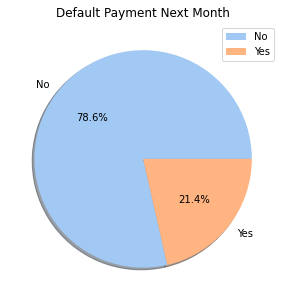

In [11]:
# filter data
def_pay = df['default_payment_next_month'].value_counts()
print(def_pay)

# plot data
plt.figure(figsize=(10,5))
colors = sns.color_palette('pastel')[0:5]
plt.pie(def_pay, labels=['No', 'Yes'],colors=colors, autopct='%0.1f%%', shadow=True)
plt.title('Default Payment Next Month')
plt.legend()

Terdapat data yang imbalance pada kolom target telihat ada 78,6 yang terklasifikasi tidak membayar default payment dibulan berikutnya sedangkan terdapat 21,4 yang terklasifikasi akan membayar.

## Feature Correlation

<AxesSubplot:>

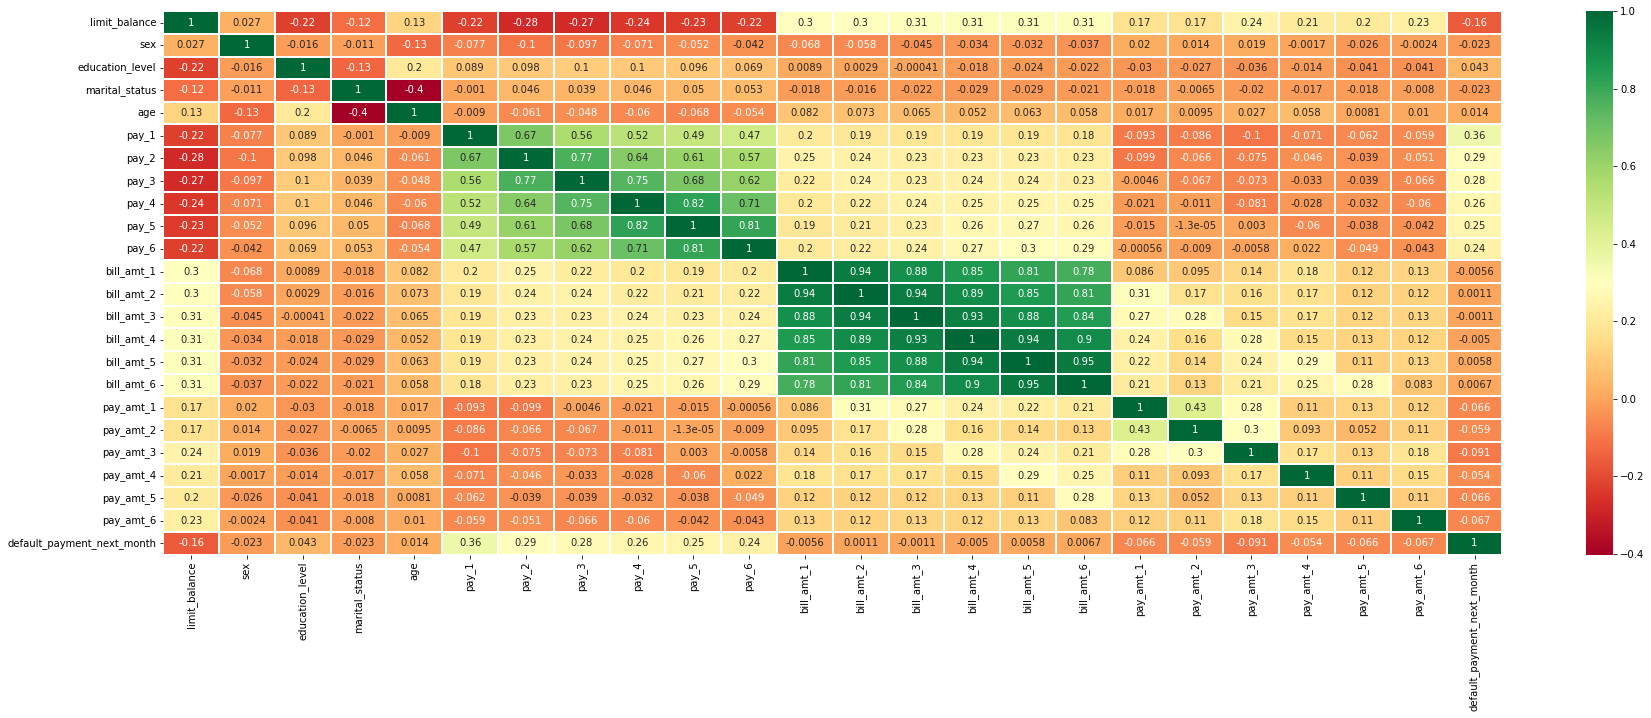

In [64]:
# Plot Heatmap
plt.figure(figsize=(30,10))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)

Terdapat positive correlation antara pay_1 - pay_6 dengan target untuk itu kita akan coba melihat bagimana pengaruh column pay_1 - 6 dengan default_payment_next_month.

## Pay

<Figure size 2160x720 with 0 Axes>

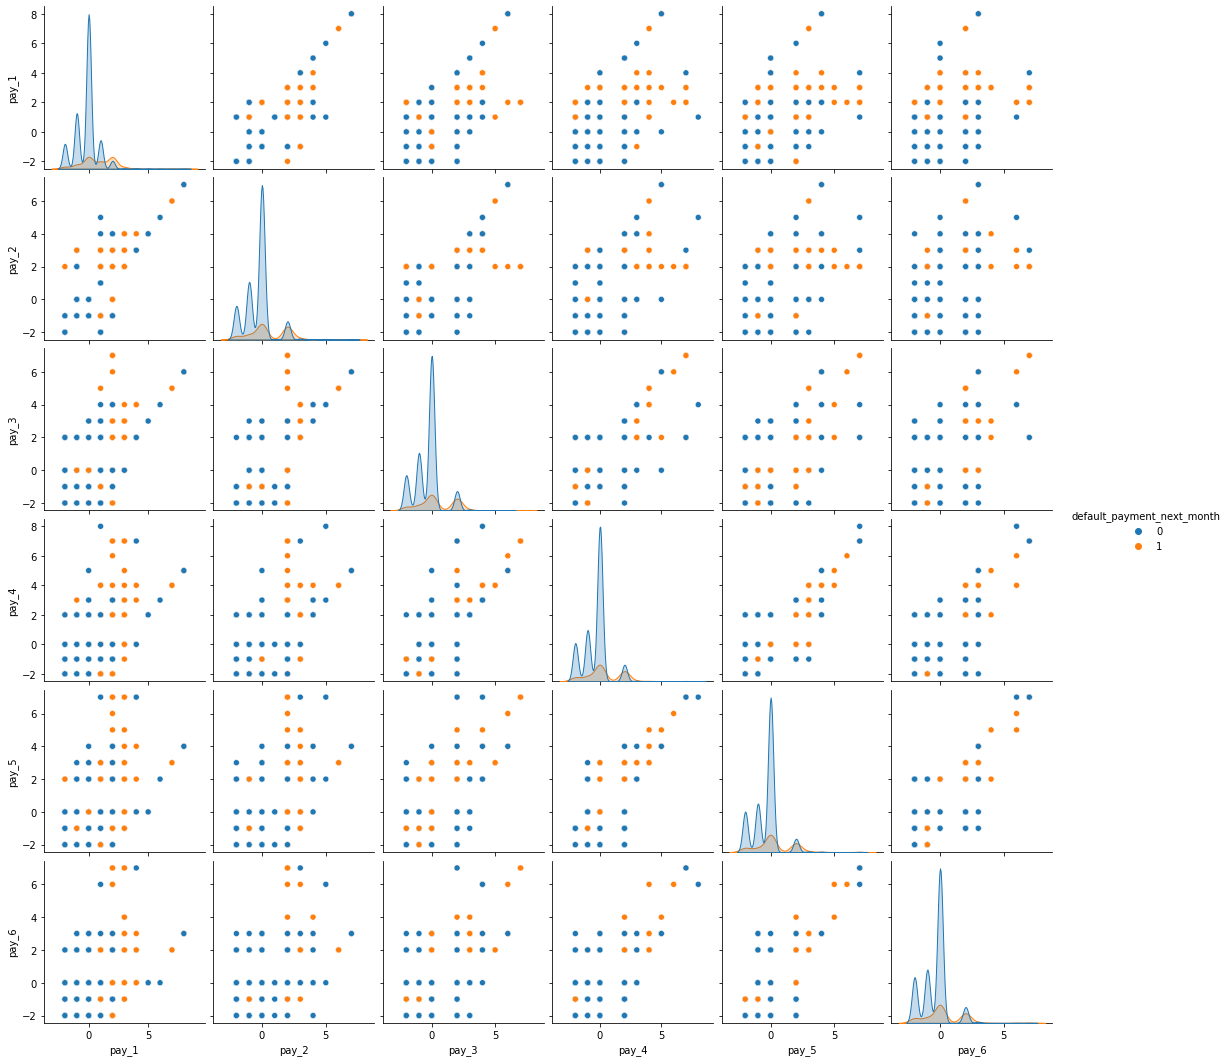

In [65]:
pay = df[['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6','default_payment_next_month']]
plt.figure(figsize=(30,10))
sns.pairplot(pay,diag_kind='kde', hue='default_payment_next_month')

Dilihat dari scatter plot , sepertinya setiap client delay dalam pembayaran ditiap bulan tidak jauh berbeda lamanya
namun personal judgement melihat bahwa client yang telat memayar lebih lama cenderung terklasifikasi membayar default dibulan depan.

## Sex

2    1801
1    1163
Name: sex, dtype: int64


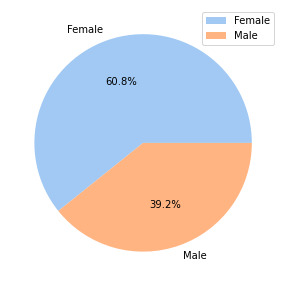

In [14]:
# filter dataframe
sex = df['sex'].value_counts()
print(sex)

# Plot data
plt.figure(figsize=(10,5))
colors = sns.color_palette('pastel')[0:5]
plt.pie(sex, labels=['Female','Male'],colors=colors, autopct='%.1f%%')
plt.legend()
plt.show()

Ternyata client yang menggunakan cartu credit lebih banyak wanita dibanding pria, terdapat 60,8% wanita sementara pria 39,2%

   sex  default_payment_next_month  count
0    1                           0    901
1    1                           1    262
2    2                           0   1428
3    2                           1    373


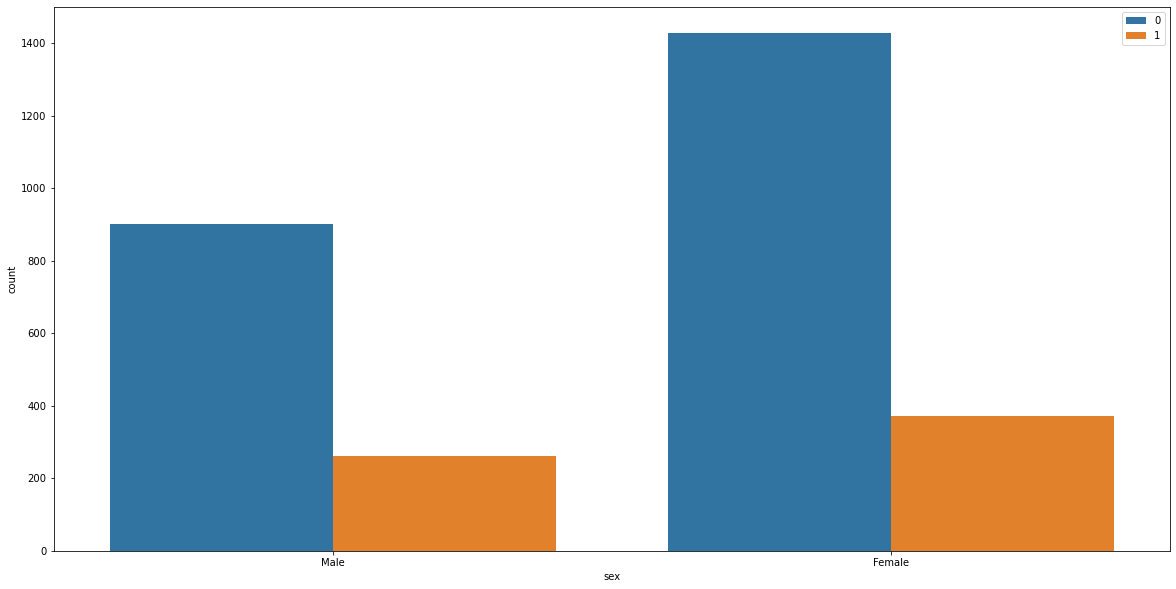

In [15]:
# filter data
sex_def_pay = df.groupby(['sex','default_payment_next_month']).size().reset_index(name='count')
print(sex_def_pay)

# plot data
plt.figure(figsize=(20,10))
sns.barplot(data=sex_def_pay,x='sex',y='count',hue='default_payment_next_month')
plt.xticks([0,1], labels=['Male','Female'])
plt.legend()
plt.show()

Dilihat dari data berbanding lurus antara sex dan default payment, dimana jumlah pengguna yang banyak adalah wanita dan yang terklasifikasi tidak membayar maupun yang membayar juga lebih banyak wanita

## Education Level

   education_level  count
0                0      2
1                1   1038
2                2   1400
3                3    483
4                4     13
5                5     24
6                6      4


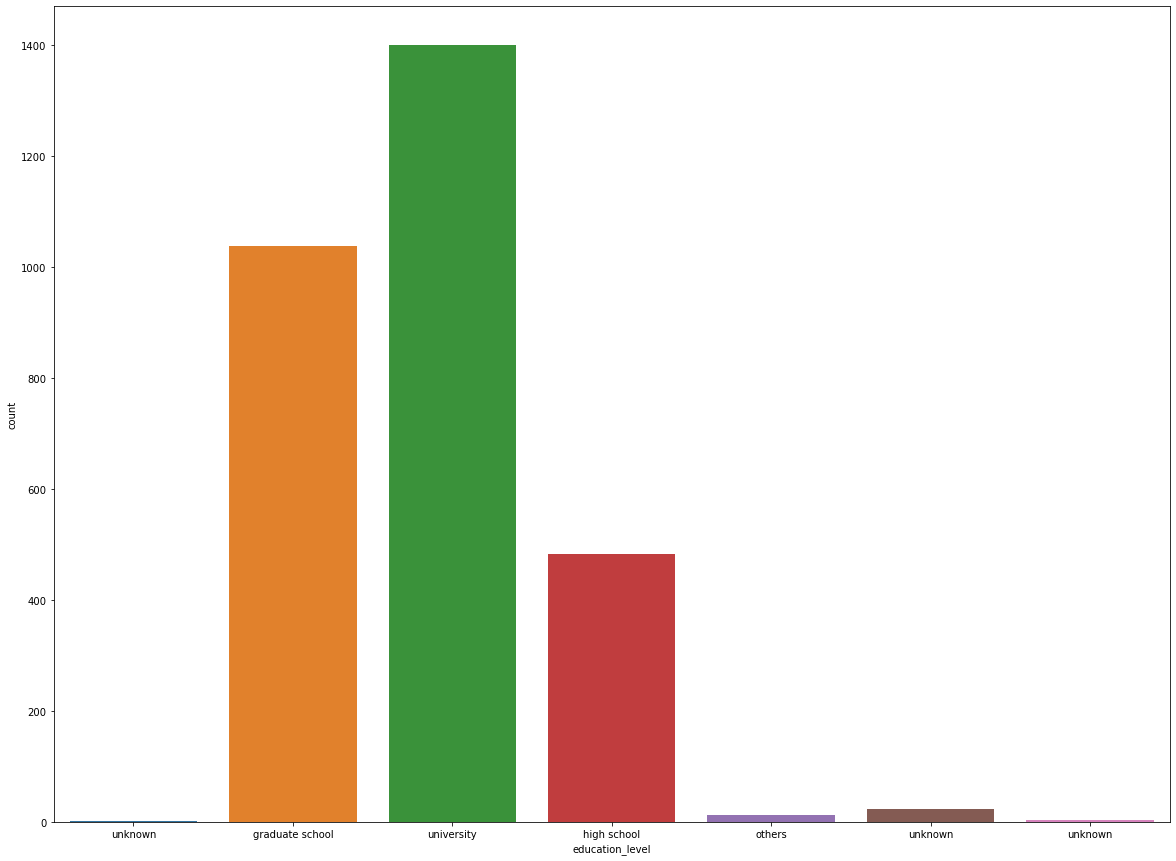

In [16]:
# filter dataframe
education_level = df.groupby('education_level').size().reset_index(name='count')
print(education_level)

# plot data
plt.figure(figsize=(20,15))
sns.barplot(data=education_level, x='education_level', y='count')
plt.xticks(ticks = [0,1,2,3,4,5,6], labels=['unknown','graduate school','university','high school','others','unknown','unknown'])
plt.show()

Education level di tingkat universitas yang memiliki client terbanyak sementara diikuti oleh graduate school da highschool lalu untuk label 0, 5, 6 akan kita handle nanti.

    education_level  default_payment_next_month  count
0                 0                           0      2
1                 1                           0    861
2                 1                           1    177
3                 2                           0   1058
4                 2                           1    342
5                 3                           0    370
6                 3                           1    113
7                 4                           0     13
8                 5                           0     23
9                 5                           1      1
10                6                           0      2
11                6                           1      2


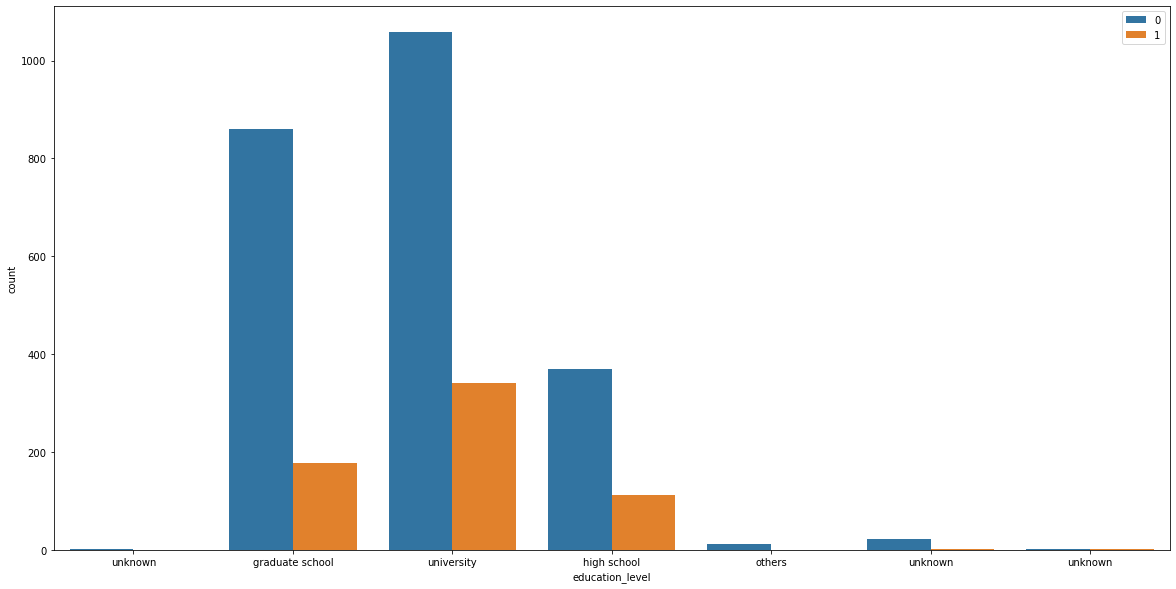

In [17]:
# Filter Data 
edu_def_pay = df.groupby(['education_level','default_payment_next_month']).size().reset_index(name='count')
print(edu_def_pay)

# Plot Data
plt.figure(figsize=(20,10))
sns.barplot(data=edu_def_pay, x='education_level', y='count', hue='default_payment_next_month')
plt.xticks(ticks = [0,1,2,3,4,5,6], labels=['unknown','graduate school','university','high school','others','unknown','unknown'])
plt.legend()
plt.show()

Sama dengan sex begitu juga dengan education_level ternyata berbanding lurus hubungan antara education_level dengan default_payment_next_month dimana education_level yang terbanyak adalah universitas dan juga terklasifikasi membayar maupun tidak juga terbanyak

## Marital Status

   marital_status  count
0               0      4
1               1   1331
2               2   1594
3               3     35


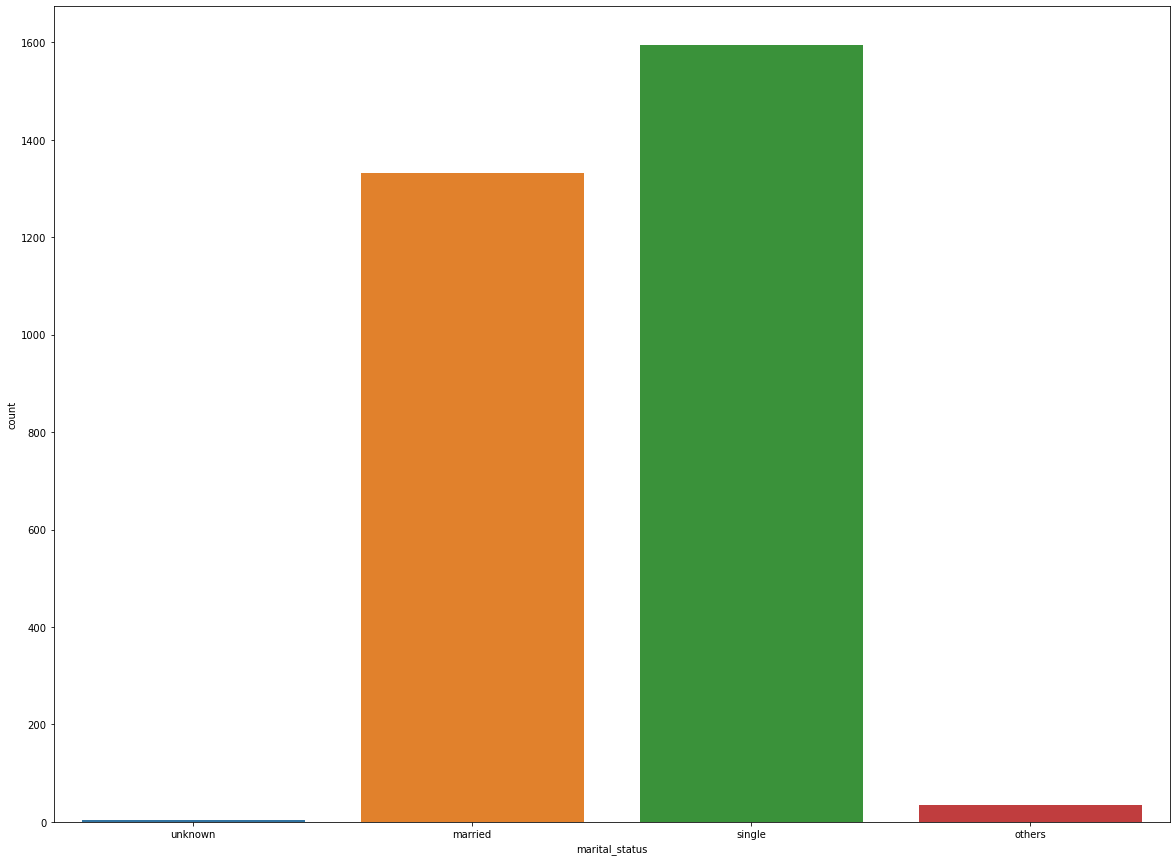

In [18]:
# Filter dataframe
marital_status = df.groupby('marital_status').size().reset_index(name='count')
print(marital_status)

# Plot data
plt.figure(figsize=(20,15))
sns.barplot(data=marital_status, x='marital_status', y='count')
plt.xticks(ticks = [0,1,2,3], labels=['unknown','married','single','others'])
plt.show()

Client terbanyak memiliki status single kemudian diikuti oleh client yang sudah menikah

   marital_status  default_payment_next_month  count
0               0                           0      4
1               1                           0   1029
2               1                           1    302
3               2                           0   1267
4               2                           1    327
5               3                           0     29
6               3                           1      6


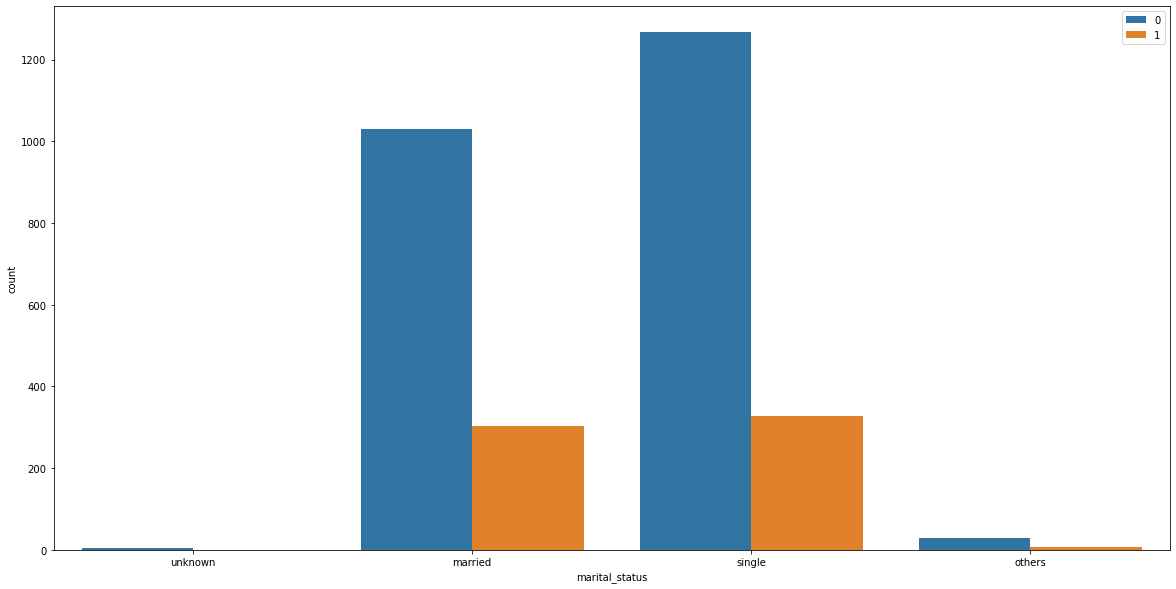

In [19]:
# Filter Data
marital_def_pay = df.groupby(['marital_status','default_payment_next_month']).size().reset_index(name='count')
print(marital_def_pay)

# plot data
plt.figure(figsize=(20,10))
sns.barplot(data=marital_def_pay, x='marital_status', y='count', hue='default_payment_next_month')
plt.xticks(ticks = [0,1,2,3], labels=['unknown','married','single','others'])
plt.legend()
plt.show()

Berbeda sangat tipis untuk client yang terklasifikasi membayar antara client berstatus single dengan yang sudah menikah namun single memang masih lebih banyak dan tetap berbeanding lurus juga untuk jumlahnya.

## Limit Balance

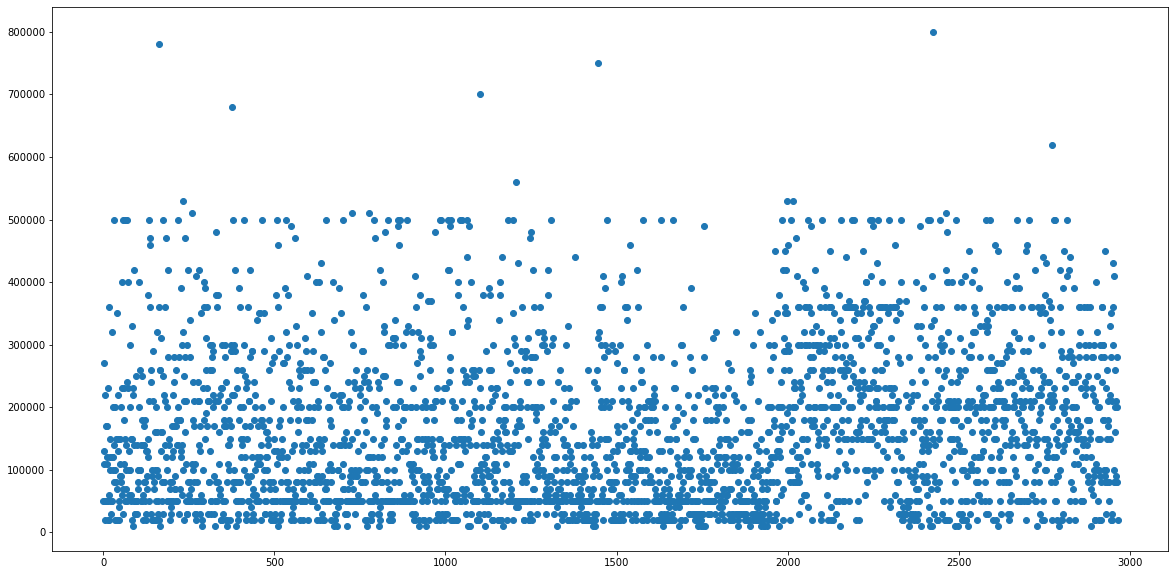

In [20]:
#plot data
plt.figure(figsize=(20,10))
plt.scatter(data=df, x=df.index,y='limit_balance')
plt.show()

terdapat beberapa client yang berbeda dari kebanyakan client dengan limit balancenya di range 600000 - 800000 dimana limit tertingggi di 800000

<AxesSubplot:xlabel='limit_balance', ylabel='default_payment_next_month'>

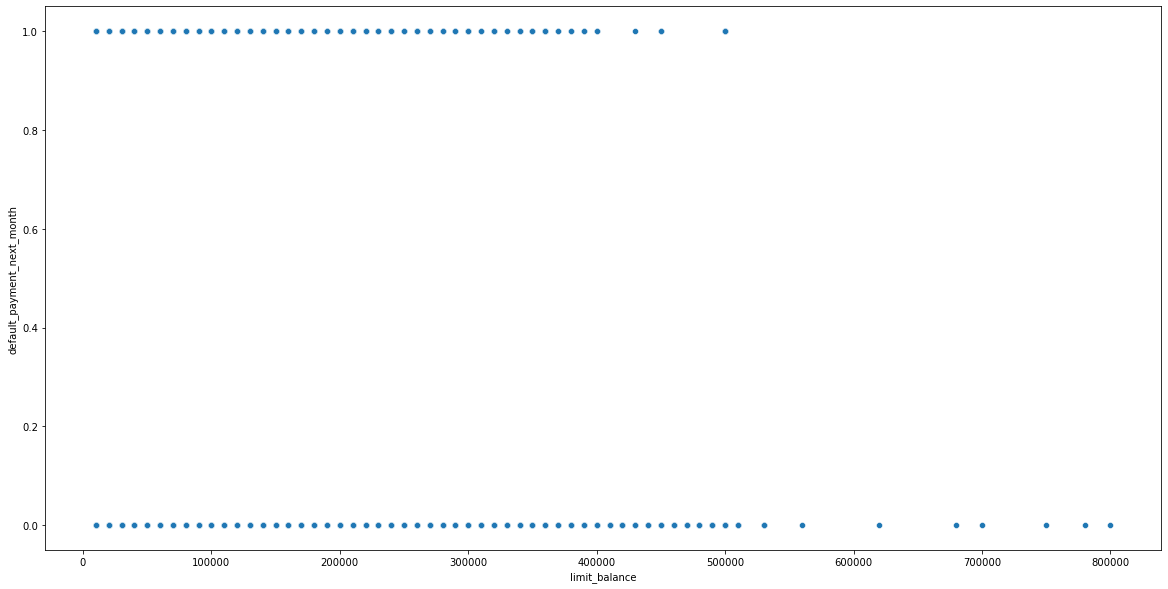

In [21]:
plt.figure(figsize=(20,10))
sns.scatterplot(data = df, x='limit_balance', y='default_payment_next_month')

Ternyata client yang punya limit credit card lebih banyak yang tidak terklasifikasi membayar default

# 5 - Data Preprocessing

## Split Data for Model Inference

In [22]:
# Split Data for model Inference
df_inf = df.sample(14, random_state=46)

# Drop data_inf from df
df.drop(df_inf.index, inplace=True)

# Reset Index
df.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

## Split Data For X_train,X_test, y_train, y_test

In [23]:
# Make X and y
X = df.drop(['default_payment_next_month'], axis=1)
y = df['default_payment_next_month']

# split X_train. X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Handling Outliers

In [24]:
# Input Paramater Distribution  Check
dist_check = X_train.skew(numeric_only=True)

normal_dist = []
skew_dist = []

for i in range(len(dist_check)):
    if dist_check.values[i] < -0.5:
        skew_dist.append(dist_check.index[i])
    elif dist_check.values[i] > 0.5:
        skew_dist.append(dist_check.index[i])
    else:
        normal_dist.append(dist_check.index[i])

In [25]:
# Skew dist
print('skew_dist :', skew_dist)
print("__________"*20)
# normal_dist
print('normal_dist :',normal_dist)
print("__________"*20)

skew_dist : ['limit_balance', 'education_level', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
________________________________________________________________________________________________________________________________________________________________________________________________________
normal_dist : ['sex', 'marital_status']
________________________________________________________________________________________________________________________________________________________________________________________________________


In [26]:
# Outliers Detection Function
# for Normally Distributed Data

def detect_normal(df, parameter):
    
    threshold = 3
    mean_ = np.mean(df[parameter])
    std_ = np.std(df[parameter])

    upper_count = df[
                    ((df[parameter]-mean_)/std_) > threshold
                    ][parameter].count()

    bottom_count = df[
                    ((df[parameter]-mean_)/std_) < -threshold
                    ][parameter].count()

    total_count = upper_count + bottom_count

    percentage = (total_count/len(df[parameter])*100).round(2)

    a = ({'Parameter':parameter, 'Total Outliers':total_count, 'Percentage':percentage})

    return print(a)

In [27]:
# Outliers Detection Function
# for Skew Distributed Data

def detect_skew(df, parameter, fold=1.5):
    
    for i in parameter:
        
        IQR = df[parameter].quantile(0.75) - df[parameter].quantile(0.25)
        upper = df[parameter].quantile(0.75) + (fold*IQR)
        bottom = df[parameter].quantile(0.25) - (fold*IQR)

        upper_count = df[
            (df[parameter] > upper)
        ][parameter].count()

        bottom_count = df[
            (df[parameter] < bottom)
        ][parameter].count()
        
        total_count = upper_count + bottom_count

        percentage = (total_count/len(df[parameter])*100).round(2)

        a = ({'Parameter':parameter, 'Total Outliers':total_count, 'Percentage':percentage})

    return print(a)

In [28]:
# Outlier summary
# For normally distributed input parameter

for i in normal_dist:
    detect_normal(X_train, parameter=i)

{'Parameter': 'sex', 'Total Outliers': 0, 'Percentage': 0.0}
{'Parameter': 'marital_status', 'Total Outliers': 0, 'Percentage': 0.0}


In [29]:
# Outlier summary
# For skew distributed input parameter

for i in skew_dist:
    detect_skew(X_train, parameter=i)

{'Parameter': 'limit_balance', 'Total Outliers': 7, 'Percentage': 0.32}
{'Parameter': 'education_level', 'Total Outliers': 31, 'Percentage': 1.4}
{'Parameter': 'age', 'Total Outliers': 17, 'Percentage': 0.77}
{'Parameter': 'pay_1', 'Total Outliers': 229, 'Percentage': 10.35}
{'Parameter': 'pay_2', 'Total Outliers': 312, 'Percentage': 14.1}
{'Parameter': 'pay_3', 'Total Outliers': 292, 'Percentage': 13.2}
{'Parameter': 'pay_4', 'Total Outliers': 257, 'Percentage': 11.62}
{'Parameter': 'pay_5', 'Total Outliers': 232, 'Percentage': 10.49}
{'Parameter': 'pay_6', 'Total Outliers': 242, 'Percentage': 10.94}
{'Parameter': 'bill_amt_1', 'Total Outliers': 159, 'Percentage': 7.19}
{'Parameter': 'bill_amt_2', 'Total Outliers': 169, 'Percentage': 7.64}
{'Parameter': 'bill_amt_3', 'Total Outliers': 164, 'Percentage': 7.41}
{'Parameter': 'bill_amt_4', 'Total Outliers': 146, 'Percentage': 6.6}
{'Parameter': 'bill_amt_5', 'Total Outliers': 161, 'Percentage': 7.28}
{'Parameter': 'bill_amt_6', 'Total Ou

In [30]:
# Use Winsorizer to remove outliers
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',
                          'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6',
                          'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
                          'limit_balance','education_level','age'])

windsoriser.fit(X_train)

X_train_outliers = windsoriser.transform(X_train)

## Feature Selection

<AxesSubplot:>

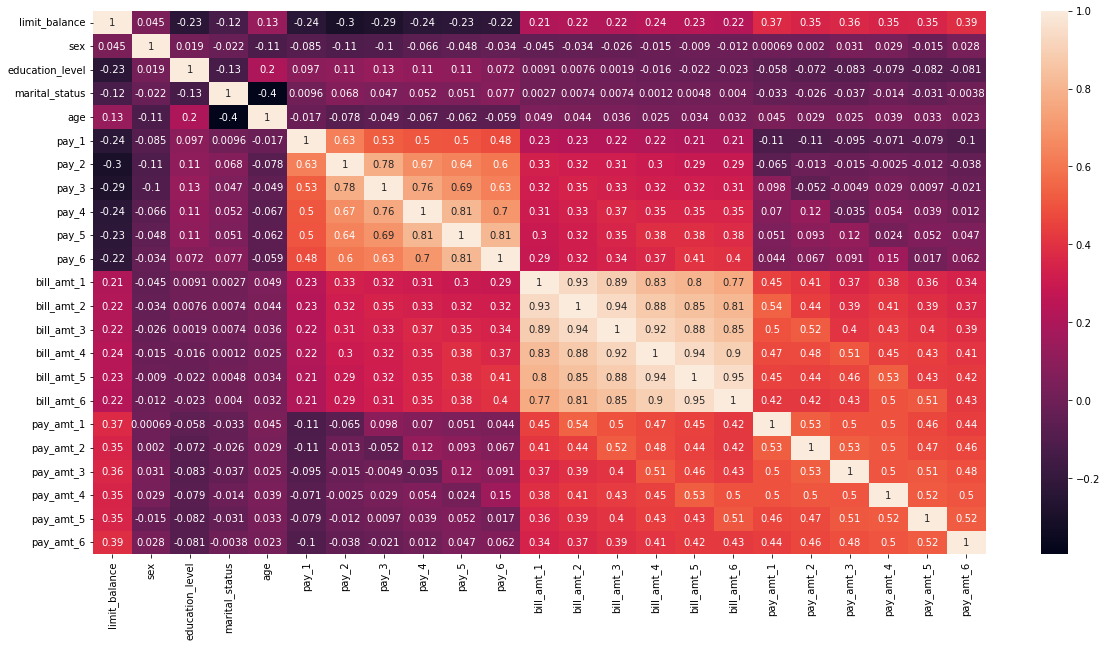

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train_outliers.corr(), annot=True)

## Feature Scaling

In [32]:
# Definite StandarScaler

scaler = StandardScaler()
scaler.fit(X_train_outliers)

X_train_scaled = scaler.transform(X_train_outliers)
X_test_scaled = scaler.transform(X_test)

# 6 - Model Definition

Data: Credit Card Default

- Target = 'default_payment_next_month'
- Feature = 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',
            'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6',
            'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
            'limit_balance','education_level','age','limit_balance','sex'

Algoritma yang dipakai:
- Logistic Regression
- Support Vector Machine
- Decision Tree Classifier
- RandomForestClassifier
- KNeighborsClassifier
- Naive Bayes
- AdaBoost

Metrics yang Dipakai :
- F1-Score
- ROC-AUC Score 

In [33]:
random_state = 46
# Definite Model
lr = LogisticRegression(random_state=random_state)
svm = SVC(random_state=random_state)
dt = DecisionTreeClassifier(random_state=random_state)
rf = RandomForestClassifier(random_state=random_state)
knn = KNeighborsClassifier()
nb = GaussianNB()
ada = AdaBoostClassifier(random_state=random_state)

# 7 - Model Training

In [34]:
# Cross-validate base model

# prepare models and put it into list
models = []
models.append(('LR', lr))
models.append(('SVM', svm))
models.append(('DT', dt))
models.append(('RF', rf))
models.append(('KNN', knn))
models.append(('NB', nb))
models.append(('ADA', ada))


# Create empty list to stores result
names = []
results = []
mean_score = []
stdev_score = []

# Cross-validate each model
for name, model in models:
    model.fit(X_train_scaled,y_train)
    scores = cross_val_score(model, X_train_scaled, y_train, scoring='accuracy', cv=5, n_jobs=4)

    names.append(name)
    results.append(scores)
    mean_score.append(round(np.mean(scores),4))
    stdev_score.append(round(np.std(scores),4))

cv_result = pd.DataFrame({'models':names, 'mean_score':mean_score, 'stdev_score':stdev_score})

# 8 - Model Evaluation

## Predict Model Base Parameter

### Logistic Regression

In [35]:
# Predict Using Logistic Regression
y_pred_train_lr = lr.predict(X_train_scaled)
y_pred_test_lr = lr.predict(X_test_scaled)

### SVM

In [36]:
# Predict Using SVM
y_pred_train_svm = svm.predict(X_train_scaled)
y_pred_test_svm = svm.predict(X_test_scaled)

### Decision Tree

In [37]:
# Predict Using Decision Tree
y_pred_train_dt = dt.predict(X_train_scaled)
y_pred_test_dt = dt.predict(X_test_scaled)

### Random Forest

In [38]:
# Predict Using Random Forest
y_pred_train_rf = rf.predict(X_train_scaled)
y_pred_test_rf = rf.predict(X_test_scaled)

### KNN

In [39]:
# Predict Using KNN
y_pred_train_knn = knn.predict(X_train_scaled)
y_pred_test_knn = knn.predict(X_test_scaled)

### Naive Bayes

In [40]:
# Predict Using Naive Bayes
y_pred_train_nb = nb.predict(X_train_scaled)
y_pred_test_nb = nb.predict(X_test_scaled)

### ADA Boost

In [41]:
# Predict Using AdaBoost
y_pred_train_ada = ada.predict(X_train_scaled)
y_pred_test_ada = ada.predict(X_test_scaled)

## Evaluation Model Base Parameter

In [42]:
# Function Plotting Conffusion Matrix
def plotConffusionMatrix(target, prediction):
    cm = confusion_matrix(target, prediction, labels=ada.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada.classes_)
    plt.figure(figsize=(10,10))
    disp.plot(include_values=True, cmap='viridis')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def showClassificationReport(target_train, prediction_train, target_test, prediction_test):
    print('==================== Train Results ====================')
    print(classification_report(target_train,prediction_train))
    print('==================== Test Results ====================')
    print(classification_report(target_test,prediction_test))

### Logistic Regression

Confusion Matrix for Train-set


<Figure size 720x720 with 0 Axes>

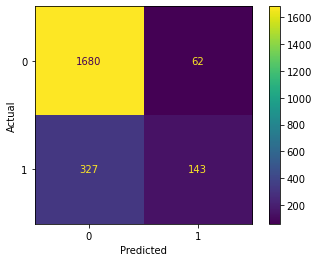

Confusion Matrix for Test-set


<Figure size 720x720 with 0 Axes>

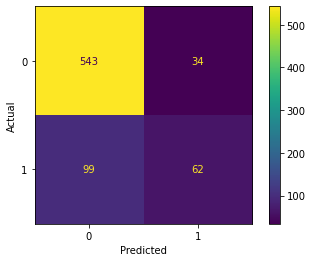

==================== Train Results ====================
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1742
           1       0.70      0.30      0.42       470

    accuracy                           0.82      2212
   macro avg       0.77      0.63      0.66      2212
weighted avg       0.81      0.82      0.80      2212

==================== Test Results ====================
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       577
           1       0.65      0.39      0.48       161

    accuracy                           0.82       738
   macro avg       0.75      0.66      0.69       738
weighted avg       0.80      0.82      0.80       738

AUC-ROC Score Train:  0.6343320223758458
AUC-ROC Score Test:  0.6630838455493719


In [43]:
# Show Confussion Matrix and Classification Report for Train-set and Test-set
print('Confusion Matrix for Train-set')
plotConffusionMatrix(y_train,y_pred_train_lr)
print('Confusion Matrix for Test-set')
plotConffusionMatrix(y_test,y_pred_test_lr)
showClassificationReport(y_train,y_pred_train_lr,y_test,y_pred_test_lr)
print('AUC-ROC Score Train: ',roc_auc_score(y_train,y_pred_train_lr))
print('AUC-ROC Score Test: ',roc_auc_score(y_test,y_pred_test_lr))

### Observasi
- confusion matrix :

**Train**

TP : 143 TN : 1680 FP : 62 FN : 327

**Test**

TP : 62 TN : 543 FP : 34 FN : 99

- f1-score : nilai dari kedua set sangat jelek dalam hal memprediksi label dengan class 1, yang terlihat disebabkan oleh data yang imbalance 
- AUC-ROC score = nilai train lebih kecil dibandingkan testnya, bisa diasumsikan model ini underfit karena nilai kedua set rendah dan nilai train set leih rendah dibandingkan testnya 

### SVM

Confusion Matrix for Train-set


<Figure size 720x720 with 0 Axes>

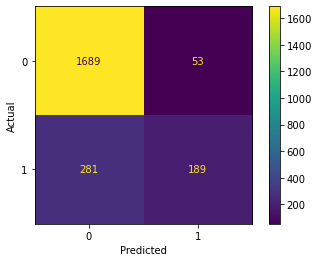

Confusion Matrix for Test-set


<Figure size 720x720 with 0 Axes>

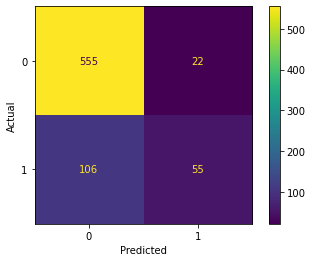

==================== Train Results ====================
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1742
           1       0.78      0.40      0.53       470

    accuracy                           0.85      2212
   macro avg       0.82      0.69      0.72      2212
weighted avg       0.84      0.85      0.83      2212

==================== Test Results ====================
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       577
           1       0.71      0.34      0.46       161

    accuracy                           0.83       738
   macro avg       0.78      0.65      0.68       738
weighted avg       0.81      0.83      0.80       738

AUC-ROC Score Train:  0.6858514302464762
AUC-ROC Score Test:  0.6517433286327868


In [44]:
print('Confusion Matrix for Train-set')
plotConffusionMatrix(y_train,y_pred_train_svm)
print('Confusion Matrix for Test-set')
plotConffusionMatrix(y_test,y_pred_test_svm)
showClassificationReport(y_train,y_pred_train_svm,y_test,y_pred_test_svm)
print('AUC-ROC Score Train: ',roc_auc_score(y_train,y_pred_train_svm))
print('AUC-ROC Score Test: ',roc_auc_score(y_test,y_pred_test_svm))

Observasi :
- confusion matrix :

**Train**

TP : 189 TN : 1689 FP : 53 FN : 281

**Test**

TP : 55 TN : 555 FP : 22 FN : 106

- f1-score : nilai dari kedua set sedikit lebih baik dari sangat jelek dalam hal memprediksi label dengan class 1, yang terlihat disebabkan oleh data yang imbalance 
- AUC-ROC score = nilai train lebih kecil dibandingkan testnya, bisa diasumsikan model ini underfit karena nilai kedua set rendah dan nilai train set leih rendah dibandingkan testnya 

### Decision Tree

Confusion Matrix for Train-set


<Figure size 720x720 with 0 Axes>

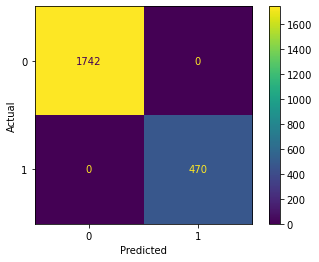

Confusion Matrix for Test-set


<Figure size 720x720 with 0 Axes>

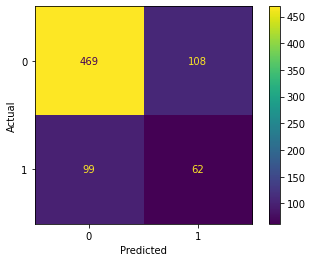

==================== Train Results ====================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1742
           1       1.00      1.00      1.00       470

    accuracy                           1.00      2212
   macro avg       1.00      1.00      1.00      2212
weighted avg       1.00      1.00      1.00      2212

==================== Test Results ====================
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       577
           1       0.36      0.39      0.37       161

    accuracy                           0.72       738
   macro avg       0.60      0.60      0.60       738
weighted avg       0.73      0.72      0.72       738

AUC-ROC Score Train:  1.0
AUC-ROC Score Test:  0.5989590621871537


In [45]:
print('Confusion Matrix for Train-set')
plotConffusionMatrix(y_train,y_pred_train_dt)
print('Confusion Matrix for Test-set')
plotConffusionMatrix(y_test,y_pred_test_dt)
showClassificationReport(y_train,y_pred_train_dt,y_test,y_pred_test_dt)
print('AUC-ROC Score Train: ',roc_auc_score(y_train,y_pred_train_dt))
print('AUC-ROC Score Test: ',roc_auc_score(y_test,y_pred_test_dt))

Observasi :
- confusion matrix :

**Train**

TP : 470 TN : 1742 FP : 0 FN : 0

**Test**

TP : 62 TN : 469 FP : 108 FN : 99

- f1-score : nilai yang dihasilkan sangat tidak akurat karena mungkin pada feature enggineer train set dilakukan handling outlier yang pada dasarnya decission tree tidak sensitive terhapar outliers
- AUC-ROC score = jelas sekali terjadi model yang overfitting

### Random Forest

Confusion Matrix for Train-set


<Figure size 720x720 with 0 Axes>

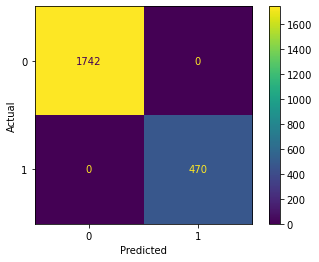

Confusion Matrix for Test-set


<Figure size 720x720 with 0 Axes>

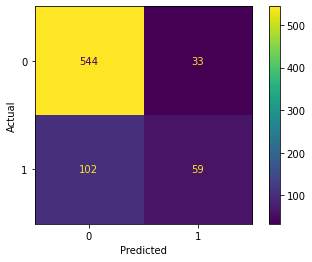

==================== Train Results ====================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1742
           1       1.00      1.00      1.00       470

    accuracy                           1.00      2212
   macro avg       1.00      1.00      1.00      2212
weighted avg       1.00      1.00      1.00      2212

==================== Test Results ====================
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       577
           1       0.64      0.37      0.47       161

    accuracy                           0.82       738
   macro avg       0.74      0.65      0.68       738
weighted avg       0.80      0.82      0.80       738

AUC-ROC Score Train:  1.0
AUC-ROC Score Test:  0.6546336264895529


In [46]:
print('Confusion Matrix for Train-set')
plotConffusionMatrix(y_train,y_pred_train_rf)
print('Confusion Matrix for Test-set')
plotConffusionMatrix(y_test,y_pred_test_rf)
showClassificationReport(y_train,y_pred_train_rf,y_test,y_pred_test_rf)
print('AUC-ROC Score Train: ',roc_auc_score(y_train,y_pred_train_rf))
print('AUC-ROC Score Test: ',roc_auc_score(y_test,y_pred_test_rf))

Observasi :
- confusion matrix :

**Train**

TP : 470 TN : 1742 FP : 0 FN : 0

**Test**

TP : 59 TN : 544 FP : 33 FN : 102

- f1-score : sama seperti decission tree terlihat bahwa hasil tidak karena data dilakukan handling outliers
- AUC-ROC score = terlihat nilai yang overfit

### KNN

Confusion Matrix for Train-set


<Figure size 720x720 with 0 Axes>

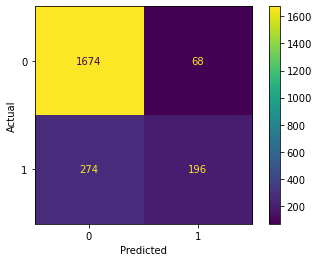

Confusion Matrix for Test-set


<Figure size 720x720 with 0 Axes>

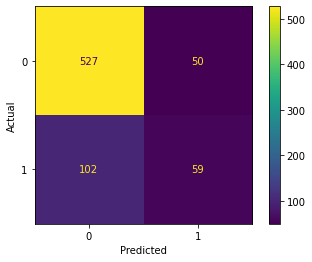

==================== Train Results ====================
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1742
           1       0.74      0.42      0.53       470

    accuracy                           0.85      2212
   macro avg       0.80      0.69      0.72      2212
weighted avg       0.83      0.85      0.83      2212

==================== Test Results ====================
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       577
           1       0.54      0.37      0.44       161

    accuracy                           0.79       738
   macro avg       0.69      0.64      0.66       738
weighted avg       0.77      0.79      0.78       738

AUC-ROC Score Train:  0.6889928426606737
AUC-ROC Score Test:  0.6399022573387729


In [47]:
print('Confusion Matrix for Train-set')
plotConffusionMatrix(y_train,y_pred_train_knn)
print('Confusion Matrix for Test-set')
plotConffusionMatrix(y_test,y_pred_test_knn)
showClassificationReport(y_train,y_pred_train_knn,y_test,y_pred_test_knn)
print('AUC-ROC Score Train: ',roc_auc_score(y_train,y_pred_train_knn))
print('AUC-ROC Score Test: ',roc_auc_score(y_test,y_pred_test_knn))

Observasi :
- confusion matrix :

**Train**

TP : 196 TN : 1674 FP : 68 FN : 274

**Test**

TP : 59 TN : 527 FP : 50 FN : 102

- f1-score : terlihat data yang imbalance, dan juga overfit
- AUC-ROC score = mennunjakan adanya kecenderungan overfit juga

### Naive Bayes

Confusion Matrix for Train-set


<Figure size 720x720 with 0 Axes>

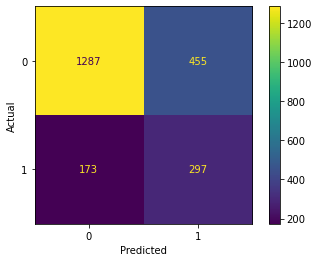

Confusion Matrix for Test-set


<Figure size 720x720 with 0 Axes>

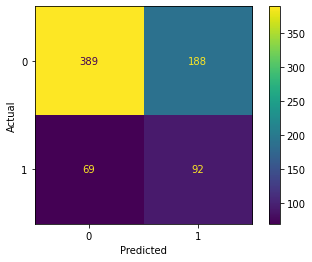

==================== Train Results ====================
              precision    recall  f1-score   support

           0       0.88      0.74      0.80      1742
           1       0.39      0.63      0.49       470

    accuracy                           0.72      2212
   macro avg       0.64      0.69      0.64      2212
weighted avg       0.78      0.72      0.74      2212

==================== Test Results ====================
              precision    recall  f1-score   support

           0       0.85      0.67      0.75       577
           1       0.33      0.57      0.42       161

    accuracy                           0.65       738
   macro avg       0.59      0.62      0.58       738
weighted avg       0.74      0.65      0.68       738

AUC-ROC Score Train:  0.6853604318831376
AUC-ROC Score Test:  0.6228026739291904


In [48]:
print('Confusion Matrix for Train-set')
plotConffusionMatrix(y_train,y_pred_train_nb)
print('Confusion Matrix for Test-set')
plotConffusionMatrix(y_test,y_pred_test_nb)
showClassificationReport(y_train,y_pred_train_nb,y_test,y_pred_test_nb)
print('AUC-ROC Score Train: ',roc_auc_score(y_train,y_pred_train_nb))
print('AUC-ROC Score Test: ',roc_auc_score(y_test,y_pred_test_nb))

Observasi :
- confusion matrix :

**Train**

TP : 297 TN : 1287 FP : 455 FN : 173

**Test**

TP : 92 TN : 389 FP : 188 FN : 69

- f1-score : dibanding kan dengan logistic regression, svm, dan knn untuk model naive bayes lebih rendah . terlihat juga efek data yang imbalance dan overfittinh 
- AUC-ROC score = nilai perbedaan yang terlihat cenderung overfitting

### ADA Boost

Confusion Matrix for Train-set


<Figure size 720x720 with 0 Axes>

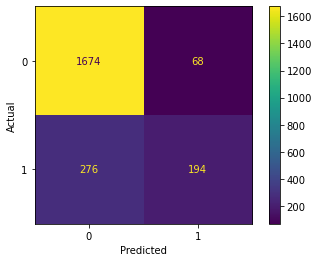

Confusion Matrix for Test-set


<Figure size 720x720 with 0 Axes>

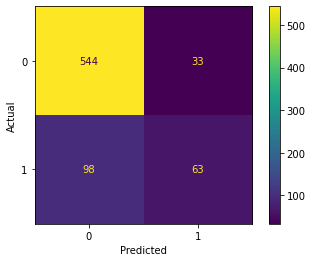

==================== Train Results ====================
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1742
           1       0.74      0.41      0.53       470

    accuracy                           0.84      2212
   macro avg       0.80      0.69      0.72      2212
weighted avg       0.83      0.84      0.83      2212

==================== Test Results ====================
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       577
           1       0.66      0.39      0.49       161

    accuracy                           0.82       738
   macro avg       0.75      0.67      0.69       738
weighted avg       0.81      0.82      0.80       738

AUC-ROC Score Train:  0.6868651830862056
AUC-ROC Score Test:  0.6670559867380002


In [49]:
print('Confusion Matrix for Train-set')
plotConffusionMatrix(y_train,y_pred_train_ada)
print('Confusion Matrix for Test-set')
plotConffusionMatrix(y_test,y_pred_test_ada)
showClassificationReport(y_train,y_pred_train_ada,y_test,y_pred_test_ada)
print('AUC-ROC Score Train: ',roc_auc_score(y_train,y_pred_train_ada))
print('AUC-ROC Score Test: ',roc_auc_score(y_test,y_pred_test_ada))

Observasi :
- confusion matrix :

**Train**

TP : 194 TN : 1674 FP : 68 FN : 276

**Test**

TP : 63 TN : 544 FP : 33 FN : 98

- f1-score : cenderung overfit, dan nilai kecil karena data yang imbalance
- AUC-ROC score = nilai menunjukkan penurunan dari train ke test yang bisa diasumsikan overfit 

## Cross Validation Score

In [50]:
# Showing the result mean descending order
cv_result.sort_values(by='mean_score', ascending=False)

,models,mean_score,stdev_score
6,ADA,0.8327,0.0159
1,SVM,0.8296,0.0075
3,RF,0.8291,0.0055
0,LR,0.8164,0.0109
4,KNN,0.8061,0.0045
2,DT,0.7518,0.0176
5,NB,0.7134,0.0266


In [51]:
# Showing the result stdev descending order
cv_result.sort_values(by='stdev_score')

,models,mean_score,stdev_score
4,KNN,0.8061,0.0045
3,RF,0.8291,0.0055
1,SVM,0.8296,0.0075
0,LR,0.8164,0.0109
6,ADA,0.8327,0.0159
2,DT,0.7518,0.0176
5,NB,0.7134,0.0266


### Observasi
Berdasarkan nilai mean dan stdev kita memiliki model SVM untuk dilakukan hyperparameter tunning karena berdasarkan mean model tersebut termasuk model top 3 dengan mean tertinggi dan berdasrkan stdev model tersebut juga terendah . Bagimana dengan random forest dia juga termasuk dalam kategori , namun kita mencoba data dengan data yang sudah di handling outliersnya.

## Hyper parameter Tunning

In [52]:
# Hyper parameter
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

# Hyperparameter tuning
grid_svm = GridSearchCV(
    svm, param_grid, cv=10 ,n_jobs = 1, verbose = 3)
grid_svm.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV 1/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.788 total time=   0.1s
[CV 2/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.788 total time=   0.1s
[CV 3/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.787 total time=   0.1s
[CV 4/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.787 total time=   0.1s
[CV 5/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.787 total time=   0.1s
[CV 6/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.787 total time=   0.1s
[CV 7/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.787 total time=   0.1s
[CV 8/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.787 total time=   0.1s
[CV 9/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.787 total time=   0.1s
[CV 10/10] END ......C=0.1, gamma=1, kernel=rbf;, score=0.787 total time=   0.1s
[CV 1/10] END .....C=0.1, gamma=0.1, kernel=rbf;, score=0.820 total time=   0.1s
[CV 2/10] END .....C=0.1, gamma=0.1, kernel=rb

GridSearchCV(cv=10, estimator=SVC(random_state=46), n_jobs=1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [53]:
# Show Best Parameters
best_params_svm = grid_svm.best_params_
best_pipe_svm = grid_svm.best_estimator_
best_score_svm = grid_svm.best_score_

print(best_params_svm)
print(best_score_svm)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.8345338551220903


## SVM After Hyperparameter Tunning

In [54]:
svm_hyper = SVC(random_state=random_state, C=best_params_svm['C'], gamma=best_params_svm['gamma'], kernel=best_params_svm['kernel'])
svm_hyper.fit(X_train_scaled,y_train)

SVC(C=10, gamma=0.01, random_state=46)

In [55]:
y_pred_train_hyper = svm_hyper.predict(X_train_scaled)
y_pred_test_hyper = svm_hyper.predict(X_test_scaled)

### Evaluation

Confusion Matrix for Train-set


<Figure size 720x720 with 0 Axes>

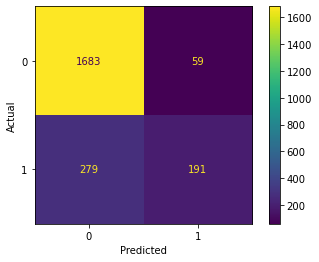

Confusion Matrix for Test-set


<Figure size 720x720 with 0 Axes>

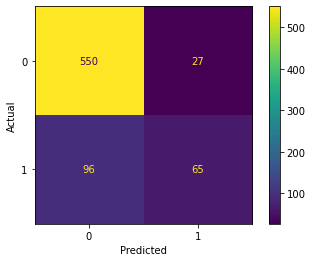

==================== Train Results ====================
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1742
           1       0.76      0.41      0.53       470

    accuracy                           0.85      2212
   macro avg       0.81      0.69      0.72      2212
weighted avg       0.84      0.85      0.83      2212

==================== Test Results ====================
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       577
           1       0.71      0.40      0.51       161

    accuracy                           0.83       738
   macro avg       0.78      0.68      0.71       738
weighted avg       0.82      0.83      0.82       738

AUC-ROC Score Train:  0.6862569313823681
AUC-ROC Score Test:  0.6784664736213225


In [56]:
# Show Confussion Matrix and Classification Report for Train-set and Test-set
print('Confusion Matrix for Train-set')
plotConffusionMatrix(y_train,y_pred_train_hyper)
print('Confusion Matrix for Test-set')
plotConffusionMatrix(y_test,y_pred_test_hyper)
showClassificationReport(y_train,y_pred_train_hyper,y_test,y_pred_test_hyper)
print('AUC-ROC Score Train: ',roc_auc_score(y_train,y_pred_train_hyper))
print('AUC-ROC Score Test: ',roc_auc_score(y_test,y_pred_test_hyper))

### Observasi
- confusion matrix :
#### Sebelum hyperparameter
**Train**

TP : 143 TN : 1680 FP : 62 FN : 327

**Test**

TP : 62 TN : 543 FP : 34 FN : 99

- f1-score : nilai dari kedua set sangat jelek dalam hal memprediksi label dengan class 1, yang terlihat disebabkan oleh data yang imbalance 
- AUC-ROC score = nilai train lebih kecil dibandingkan testnya, bisa diasumsikan model ini underfit karena nilai kedua set rendah dan nilai train set leih rendah dibandingkan testnya 

#### Sesudah hyperparameter 
**Train**

TP : 191 TN : 1683 FP : 59 FN : 279

**Test**

TP : 65 TN : 550 FP : 27 FN : 96

- f1-score : nilai testnya naik, namun memang masih cenderung overfit
- AUC-ROC score = begitu juga dengan auc-rocnya nilai di testnya naik namun masih cenderung overfit

## Save Model

In [57]:
with open('svm_hyper.pickle', 'wb') as f:
    pickle.dump(svm_hyper, f)

with open('scaler.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# 9 - Model Inference

## Load Data

In [58]:
# Load Data
with open('svm_hyper.pickle', 'rb') as f:
    svm_hyper = pickle.load(f)
with open('scaler.pickle', 'rb') as f:
    scaler = pickle.load(f)

## Inference

In [59]:
# Show Data
df_inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,20000.0,1,3,2,31.0,0.0,0.0,0.0,0.0,0,0,7222.0,13627.0,11974.0,11467.0,10469.0,9380.0,10009.0,2004.0,5013.0,3010.0,3690.0,4384.0,0
1,200000.0,2,1,2,41.0,-1.0,-1.0,-1.0,-1.0,-1,-1,504.0,2502.0,21699.0,2914.0,3392.0,4343.0,2502.0,21699.0,3003.0,3392.0,4343.0,326.0,0
2,350000.0,2,2,3,44.0,2.0,2.0,-2.0,-2.0,-2,-1,52949.0,-4577.0,-4577.0,-2699.0,-2699.0,297301.0,3682.0,0.0,1878.0,0.0,300000.0,0.0,0
3,100000.0,2,2,1,29.0,0.0,0.0,0.0,2.0,2,2,73742.0,75216.0,82006.0,84044.0,84532.0,80828.0,2700.0,8000.0,4304.0,3000.0,0.0,3000.0,1
4,50000.0,2,2,1,40.0,0.0,0.0,0.0,0.0,0,0,31934.0,32711.0,34061.0,32672.0,32479.0,33431.0,2000.0,3000.0,3000.0,3000.0,2000.0,1000.0,1
5,70000.0,2,2,2,22.0,0.0,0.0,0.0,0.0,0,0,53399.0,49108.0,49674.0,44568.0,31156.0,30954.0,1841.0,2243.0,1467.0,1076.0,1096.0,1494.0,0
6,50000.0,2,2,1,31.0,0.0,0.0,0.0,0.0,0,0,13641.0,15409.0,16052.0,15993.0,15780.0,15549.0,2000.0,1223.0,1000.0,1000.0,1000.0,1000.0,0
7,110000.0,1,1,2,33.0,0.0,0.0,0.0,0.0,0,0,111249.0,111480.0,64237.0,57066.0,112716.0,57044.0,4000.0,2800.0,2200.0,2200.0,3000.0,2000.0,0
8,50000.0,1,3,1,40.0,1.0,2.0,0.0,0.0,0,0,24091.0,13698.0,14908.0,15033.0,15705.0,11616.0,0.0,1475.0,600.0,1000.0,500.0,570.0,0
9,50000.0,1,1,2,23.0,0.0,0.0,0.0,0.0,0,0,34376.0,35300.0,32106.0,32994.0,18220.0,18755.0,1806.0,1612.0,1500.0,652.0,828.0,957.0,0


In [60]:
# Split Data X and Y
X_inf = df_inf.drop(['default_payment_next_month'], axis=1)
y_inf = df_inf['default_payment_next_month']

In [61]:
# Scale Data
X_inf_scaled = scaler.transform(X_inf)

In [62]:
# Predict Inference Data
y_pred_inf = svm_hyper.predict(X_inf_scaled)

Confusion Matrix for Train-set


<Figure size 720x720 with 0 Axes>

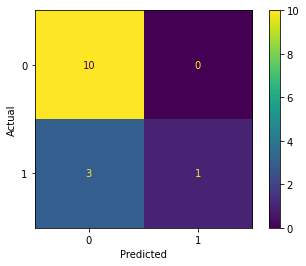

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.25      0.40         4

    accuracy                           0.79        14
   macro avg       0.88      0.62      0.63        14
weighted avg       0.84      0.79      0.74        14

AUC-ROC Score Inference:  0.625


In [63]:
# Show Confussion Matrix and Classification Report for Inference Data
print('Confusion Matrix for Train-set')
plotConffusionMatrix(y_inf,y_pred_inf)
print(classification_report(y_inf,y_pred_inf))
print('AUC-ROC Score Inference: ',roc_auc_score(y_inf,y_pred_inf))

- f1 score : Dibandingkan dengan test set hasil dari inference menurun
- auc - roc score : begitu juga dengan auc-rocnya

# 10 - Pengambilan Kesimpulan

 ## Hasil EDA:
 - Data memiliki 2965 rows dan 24 columns dengan tipe data int dan float.
 - Target merupakan Imbalance Data karena, klasifikasi untuk 0 = 78,6% dan 1 = 21,4%
 - Berdasarkan Plot Corelation antara feature dan target ada corelation yang positif yaitu feature pay_1 sampai Pay 6.
 Setelah dilihat visualisasi data memang cukup tidak terlihat patern yang terbentuk, namun berdasarkan personal judgment menemukan relasi seperti :
    1. Client yang delay dalam 1 bulan mayoritas akan delay juga di bulan berikutnya
    2. Cukup unik bahwa client yang telat membayar lebih lama cenderung mereka yang terklasifikasi membayar default dibulan depannya.  
  
 - Ternyata client yang menggunakan cartu credit lebih banyak wanita dibanding pria, terdapat 60,8% wanita sementara pria 39,2%
 - Dilihat dari data berbanding lurus antara sex dan default payment, dimana jumlah pengguna yang banyak adalah wanita dan yang terklasifikasi tidak membayar maupun yang membayar juga lebih banyak wanita
 - Education level di tingkat universitas yang memiliki client terbanyak sementara diikuti oleh graduate school dan highschool.
   Sama dengan sex begitu juga dengan education_level ternyata berbanding lurus hubungan antara education_level dengan default_payment_next_month dimana education_level 
   yang terbanyak adalah universitas dan juga terklasifikasi membayar maupun tidak juga terbanyak
 - Client terbanyak memiliki status single kemudian diikuti oleh client yang sudah menikah
   Berbeda sangat tipis untuk client yang terklasifikasi membayar antara client berstatus single dengan yang sudah menikah namun single memang masih lebih banyak dan tetap berbeanding lurus juga untuk jumlahnya.
 - Dalam limit_balance terdapat beberapa client yang berbeda dari kebanyakan client dengan limit balancenya di range 600000 - 800000 dimana limit tertingggi di 800000
 Ternyata client yang punya limit credit card lebih banyak yang tidak terklasifikasi membayar default.

## Model Analysis
Data: Credit Card Default

- Target = 'default_payment_next_month'
- Feature = 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',
            'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6',
            'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
            'limit_balance','education_level','age','limit_balance','sex'

Algoritma yang dipakai:
- Logistic Regression
- Support Vector Machine
- Decision Tree Classifier
- RandomForestClassifier
- KNeighborsClassifier
- Naive Bayes
- AdaBoost

Metrics yang Dipakai :
- F1-Score
- ROC-AUC Score 

----------------------------------------------

### Hasil Observasi
- Logistic Regression

    - f1-score : nilai dari kedua set sangat jelek dalam hal memprediksi label dengan class 1, yang terlihat disebabkan oleh data yang imbalance 
    - AUC-ROC score = nilai train lebih kecil dibandingkan testnya, bisa diasumsikan model ini underfit karena nilai kedua set rendah dan nilai train set leih rendah dibandingkan testnya 
- SVM
    - f1-score : nilai dari kedua set sedikit lebih baik dari sangat jelek dalam hal memprediksi label dengan class 1, yang terlihat disebabkan oleh data yang imbalance 
    - AUC-ROC score = nilai train lebih kecil dibandingkan testnya, bisa diasumsikan model ini underfit karena nilai kedua set rendah dan nilai train set leih rendah dibandingkan testnya 
- Decission Tree
    - f1-score : nilai yang dihasilkan sangat tidak akurat karena mungkin pada feature enggineer train set dilakukan handling outlier yang pada dasarnya decission tree tidak sensitive terhapar outliers
    - AUC-ROC score = jelas sekali terjadi model yang overfitting

- Random Forest
    - f1-score : sama seperti decission tree terlihat bahwa hasil tidak karena data dilakukan handling outliers
    - AUC-ROC score = terlihat nilai yang overfit
- KNN
    - f1-score : terlihat data yang imbalance, dan juga overfit
    - AUC-ROC score = mennunjakan adanya kecenderungan overfit juga
- Naive Bayes
    - f1-score : dibanding kan dengan logistic regression, svm, dan knn untuk model naive bayes lebih rendah . terlihat juga efek data yang imbalance dan overfittinh 
    - AUC-ROC score = nilai perbedaan yang terlihat cenderung overfitting
- AdaBoost
    - f1-score : cenderung overfit, dan nilai kecil karena data yang imbalance
    - AUC-ROC score = nilai menunjukkan penurunan dari train ke test yang bisa diasumsikan overfit 

-----------------------------------------------------------

Untuk menentukan model mana yang akan kita tunning Kita menggunakan Cross Validation Score untuk melihat model mana yang terbaik berdasarkan mean dan stdevnya. 

Hasil yang Didapat menyimpulkan bahwa Model SVM yang terbaik, maka kita akan melakukan Hyperparameter tunning terhapat model tersebut dengan menggunakan Grid Search untuk mencari best parameternya

Best parameternya adalah:

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

-----------------------------------------------------------

Untuk itu kita melakukan training ulang dan mendapatkan hasil evaluasi 
- confusion matrix :
#### Sebelum hyperparameter
**Train**

TP : 143 TN : 1680 FP : 62 FN : 327

**Test**

TP : 62 TN : 543 FP : 34 FN : 99

- f1-score : nilai dari kedua set jelek dalam hal memprediksi label dengan class 1, yang terlihat disebabkan oleh data yang imbalance 
- AUC-ROC score = nilai train lebih kecil dibandingkan testnya, bisa diasumsikan model ini underfit karena nilai kedua set rendah dan nilai train set leih rendah dibandingkan testnya 

#### Sesudah hyperparameter 
**Train**

TP : 191 TN : 1683 FP : 59 FN : 279

**Test**

TP : 65 TN : 550 FP : 27 FN : 96

- f1-score : nilai testnya naik, namun memang masih cenderung overfit
- AUC-ROC score = begitu juga dengan auc-rocnya nilai di testnya naik namun masih cenderung overfit


## Conceptual Problems:

- Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!

    paramater criterion adalah parameter yang menentukan sebuah node bisa di split lagi atau tidak. Terdapat 2 value dalam parameter criterion yaitu gini dan entropy.
    Gini sebuah metric yang menentukan kemurnian dari sebuah node, range gini dari 0 - 1 semakin gini mendekati 0 maka node tersebut sudah dikatakan murni artinya dia tidak akan di split. Meskipun keputusan di split atau tidak bukan hanya dari metric gini ini. 

- Apakah fungsi dari pruning pada Tree model?

    pruning adalah teknik untuk mengurangi overfitting pada model 

- Bagaimana cara memilih K yang optimal pada KNN?

    tidak ada metode yang pasti untuk itu kita harus coba-coba nilai k nya. satu hal yang pasti kita mencari nilai k yang mengurangi nilai erornya, jika kita mengurangi nilai k mendekati 1 prediksi akan semakin kurang stabil, begitupun sebaliknya

- Jelaskan apa yang kalian ketahui tentang Cross Validation!

    teknik yang dipakai untuk menilai model machine learning dan menguji performanya,cross validation berguna untuk memilih model dan membuat mudah untuk menguji kemampuan model terhadap data yang baru. 

- Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

    acuracy = metric mengukur kemampuan model mendeteksi dengan benar sesuai dengan target dari data, metrics ini sangat tidak bisa diandalkan dalam model yang mempunyai data imbalance
    Precission = sebuah metric yang melihat dari positif prediction berapa yang benar - benar positif
    Recall = sebuah metric yang melihat semua data yang benar - benar positif berapa orang yang terprediksi benar
    F1 Score = adalah mean harmonic dari precission dan recall, dan biasanya menjadi matric acuan untuk membandingkan model